Text(0, 0.5, '准确率')

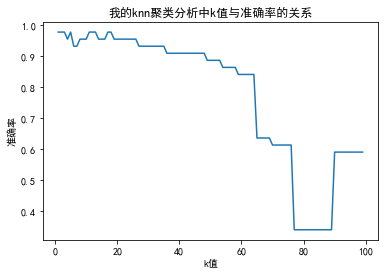

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

def cluster(x):                                         # 进行聚类
    global trainingSet
    arr = []
    for i in range(0, len(trainingSet)):
        a = 0
        for j in range(0, len(x)):                      # 计算距离
            a += (x[j] - trainingSet.loc[i, j]) ** 2
        arr.append(a)
    dist = pd.DataFrame(data=[arr, trainingSet[trainingSet.shape[1]-1]]).T
    x = x.append(pd.Series([dist.sort_values(0)[0:k][1].value_counts().index[0]]), len(x))
    trainingSet = trainingSet.append(x, len(trainingSet))
    return x

data = pd.read_csv('数据集/iris/iris.data', header=None).drop_duplicates().reset_index(drop=True)
back_up = trainingSet = data.sample(frac=0.7, replace=False, random_state=None).reset_index(drop=True)        # 随机抽取70%作为训练集
anwser = data.append(trainingSet).drop_duplicates(keep=False).reset_index(drop=True)                # 剩下30%作为测试集
testSet = anwser[range(0, data.shape[1]-1)]
precision = []
for k in range(1, 100):
    knn = testSet.apply(cluster, axis=1)                                                            # 用apply进行遍历聚类
    precision.append(len(knn[knn[knn.shape[1] - 1] == anwser[anwser.shape[1] - 1]]) / len(knn))
    trainingSet = back_up
plt.rcParams['font.sans-serif'] = ['SimHei']                                                        # 设置字体
plt.rcParams['font.serif'] = ['SimHei']
plt.plot(range(1, 100), precision)
plt.title('我的knn聚类分析中k值与准确率的关系')
plt.xlabel("k值")
plt.ylabel("准确率")

Text(0, 0.5, '准确率')

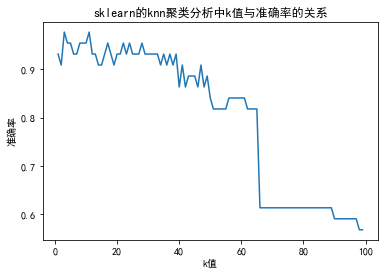

In [16]:
from sklearn.neighbors import KNeighborsClassifier

precision = []
for k in range(1, 100):
    Knn = pd.Series(KNeighborsClassifier(k).fit(trainingSet[range(0, trainingSet.shape[1]-1)], trainingSet[trainingSet.shape[1]-1]).predict(testSet))
    precision.append(len(Knn[Knn == anwser[anwser.shape[1]-1]]) / len(Knn))
plt.plot(range(1, 100), precision)
plt.title('sklearn的knn聚类分析中k值与准确率的关系')
plt.xlabel("k值")
plt.ylabel("准确率")